In [37]:
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import pandas as pd
import talib as ta 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy

In [38]:
# 读取BCHAIN-MKPRU.csv文件
df_BM = pd.read_csv('data_set/BCHAIN-MKPRU.csv', encoding='utf-8')
# 读取LBMA-GOLD.csv文件
df_GOLD = pd.read_csv('data_set/test.csv', encoding='utf-8')


In [39]:
#收益率
bm_rising=[0]
for i in range(len(df_BM)-1):
    bm_rising.append(df_BM.values[i+1][1]/df_BM.values[i][1])

gold_rising=[0]
for i in range(len(df_GOLD)-1):
    gold_rising.append(df_GOLD.values[i+1][2]/df_GOLD.values[i][2])

In [40]:
df_BM.values[2][1]

610.92

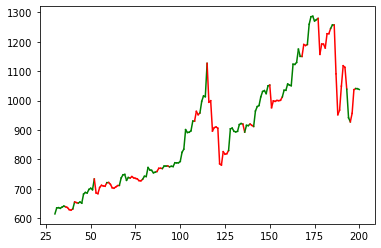

In [41]:
test=[]
all=0
all_constant=30
last=0
time=0
last_constant=6
color=0
COLOR="r"
color_max=1
for i in range(all_constant):
    all=all+abs(df_BM.values[i+1][1]-df_BM.values[i][1])
for i in range(last_constant):
    last=last+abs(df_BM.values[i+all_constant+1-last_constant][1]-df_BM.values[i+all_constant-last_constant][1])
for i in range(170):
    j=all_constant+i
    if((df_BM.values[j+1][1]-df_BM.values[j-all_constant+1][1])/all<(df_BM.values[j+1][1]-df_BM.values[j-last_constant+1][1])/last*0.85):
        test.append(1)
        time=time+1
        if color<color_max:
            color=color+1
        # plt.plot([j,j+1],[df_BM.values[j][1],df_BM.values[j+1][1]],color='g')
    elif((df_BM.values[j+1][1]-df_BM.values[j-all_constant+1][1])/all>(df_BM.values[j+1][1]-df_BM.values[j-last_constant+1][1])/last*1.2 ):
        if color>0:
            color=color-1
        test.append(0)
        # plt.plot([j,j+1],[df_BM.values[j][1],df_BM.values[j+1][1]],color='r')
    if color==color_max:
        COLOR='g'
    if color==0:
        COLOR="r"
    plt.plot([j,j+1],[df_BM.values[j][1],df_BM.values[j+1][1]],color=COLOR)

    all=all+abs(df_BM.values[j+1][1]-df_BM.values[j][1])-abs(df_BM.values[j-all_constant+1][1]-df_BM.values[j-all_constant][1])
    last=last+abs(df_BM.values[j+1][1]-df_BM.values[j][1])-abs(df_BM.values[j-last_constant+1][1]-df_BM.values[j-last_constant][1])
plt.savefig("one1.png")

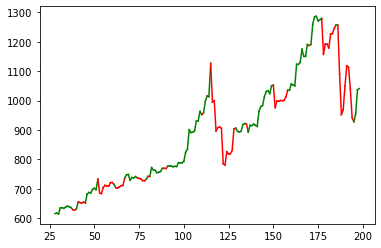

In [42]:
test=[]
all=0
all_constant=28
last=0
time=0
last_constant=8
color=0
COLOR="r"
color_max=1
for i in range(all_constant):
    all=all+abs(df_GOLD.values[i+1][1]-df_GOLD.values[i][1])
for i in range(last_constant):
    last=last+abs(df_GOLD.values[i+all_constant+1-last_constant][1]-df_GOLD.values[i+all_constant-last_constant][1])
for i in range(170):
    j=all_constant+i
    if((df_GOLD.values[j+1][1]-df_GOLD.values[j-all_constant+1][1])/all<(df_GOLD.values[j+1][1]-df_GOLD.values[j-last_constant+1][1])/last*1):
        test.append(1)
        time=time+1
        if color<color_max:
            color=color+1
        # plt.plot([j,j+1],[df_GOLD.values[j][1],df_GOLD.values[j+1][1]],color='g')
    elif((df_GOLD.values[j+1][1]-df_GOLD.values[j-all_constant+1][1])/all>(df_GOLD.values[j+1][1]-df_GOLD.values[j-last_constant+1][1])/last*1 or (df_GOLD.values[j+1][1]-df_GOLD.values[j-last_constant+1][1])/last*1<-0.3):
        if color>0:
            color=color-1
        test.append(0)
        # plt.plot([j,j+1],[df_GOLD.values[j][1],df_GOLD.values[j+1][1]],color='r')
    if color==color_max:
        COLOR='g'
    if color==0:
        COLOR="r"
    plt.plot([j,j+1],[df_GOLD.values[j][1],df_GOLD.values[j+1][1]],color=COLOR)

    all=all+abs(df_GOLD.values[j+1][1]-df_GOLD.values[j][1])-abs(df_GOLD.values[j-all_constant+1][1]-df_GOLD.values[j-all_constant][1])
    last=last+abs(df_GOLD.values[j+1][1]-df_GOLD.values[j][1])-abs(df_GOLD.values[j-last_constant+1][1]-df_GOLD.values[j-last_constant][1])
plt.savefig("one2.png")

In [43]:
(df_BM.values[j+1][1]-df_BM.values[j-29][1])*last-(df_BM.values[j+1][1]-df_BM.values[j-last_constant+1][1])*all

-31582.490247021386

In [44]:
def EMA(arr,period=21):
    data = np.full(arr.shape,np.nan)
    for i in range(period-1,len(arr)):
        data[i] = _ema(arr[i+1-period:i+1])
    return data

def _ema(arr):
    N = len(arr)
    α = 2/(N+1)
    data = np.zeros(len(arr))
    for i in range(len(data)):
        data[i] = arr[i] if i==0 else α*arr[i]+(1-α)*data[i-1]  #从首开始循环
    return data[-1]
    
def _ema(arr,i=None):
    N = len(arr) 
    α = 2/(N+1) #平滑指数
    i = N-1 if i is None else i
    if i==0:
        return arr[i]
    else:
        data = 0 
        data += (α*arr[i]+(1-α)*EMA(arr,i-1))  #递归公式
        return data

In [45]:
def EMA(arr,period=21):
    df = pd.DataFrame(arr)
    return df.ewm(span=period,min_periods=period).mean()

    

In [46]:
values=df_GOLD.values[:,2]
values=np.array(values)
values=values.astype("double")
values
diff_GOLD, dea_GOLD, my_macd_GOLD = ta.MACD(values,fastperiod=12, slowperiod=26,signalperiod=9)
gold_RSI_30=ta.RSI(values,30)
gold_RSI_7=ta.RSI(values,7)

In [47]:
values=df_BM.values[:,1]
values=np.array(values)
values=values.astype("double")
values
diff_B, dea_B, my_macd_B = ta.MACD(values,fastperiod=12, slowperiod=26,signalperiod=9)
bm_RSI_30=ta.RSI(values,28)
bm_RSI_7=ta.RSI(values,8)

In [51]:
gold_Data=df_GOLD.values[:,2]
bm_Data=df_GOLD.values[:,1]


In [52]:
diff_RSI=bm_RSI_7-bm_RSI_30

In [53]:
diff_RSI_sign=diff_RSI
for i in range(0,1826):
    if(diff_RSI[i]>0):
        diff_RSI_sign[i]=1
    else:
        diff_RSI_sign[i]=0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [54]:
RSI7_50=[]
# RSI7_50[0:50]=0

sum=0
for i in range(0,50):
    if(i<20):
        RSI7_50.append(0)
    else:
        RSI7_50.append(i)
    sum+=diff_RSI_sign[i]
# print(sum)
RSI7_50.append(sum)
for i in range(51,1826):
    RSI7_50.append(RSI7_50[i-1]+diff_RSI_sign[i-1]-diff_RSI_sign[i-51])
RSI7_50[0:50]=np.ones(50)*20


In [56]:
RSI7_100=[]

sum=0
for i in range(0,100):
    if(i<20):
        RSI7_100.append(0)
    else:
        RSI7_100.append(20)
    sum+=diff_RSI_sign[i]
# print(sum)
RSI7_100.append(sum)
for i in range(101,1826):
    RSI7_100.append(RSI7_100[i-1]+diff_RSI_sign[i-1]-diff_RSI_sign[i-51])

In [58]:
global Large_rise
Large_rise=-40

In [59]:
import torch
from torch import nn
import pandas as pd
import numpy as np

class LSTM(nn.Module):
    def __init__(self, day_predict):
        super(LSTM, self).__init__()

        self.lstm = nn.LSTM(
            input_size=2,
            hidden_size=128,
            num_layers=4,
            batch_first=True)

        self.out = nn.Sequential(
            nn.Linear(128, 2))

        self.day_predict = day_predict

    def forward(self, x):
        r_out, (_,_) = self.lstm(x, None)
        out = self.out(r_out[:, -self.day_predict:, :])

        return out

def multi_predict(present_day,csv1_path,csv2_path,model_path):

    rnn=LSTM(14)
    rnn=torch.load(model_path)

    if torch.cuda.is_available():
        rnn=rnn.cuda()
    else:
        rnn=rnn.cpu()

    df1 = pd.read_csv(csv1_path,parse_dates=['Date'],index_col=0)
    second_column_name1 = df1.columns[0]
    df1[second_column_name1].fillna(method='ffill', inplace=True)
    df2 = pd.read_csv(csv2_path,parse_dates=['Date'],index_col=0)
    second_column_name2 = df2.columns[0]
    df2[second_column_name2].fillna(method='ffill', inplace=True)

    df=df1.copy()
    df[second_column_name2]=df2[second_column_name2].copy()
    df[second_column_name2].fillna(method='ffill',inplace=True)
    df[second_column_name2].fillna(method='bfill',inplace=True)

    all_data_array=df.values
    train_max=np.max(all_data_array,axis=0).reshape(1,2).copy()
    train_min=np.min(all_data_array,axis=0).reshape(1,2).copy()
    all_data_array=(all_data_array-train_min)/(train_max-train_min)

    PRESENT_DAY=present_day

    x=torch.Tensor(all_data_array[PRESENT_DAY-60:PRESENT_DAY])
    if torch.cuda.is_available():
        x=x.cuda()

    y=rnn(torch.unsqueeze(x,dim=0)).cpu().detach().numpy()

    y=y*(train_max-train_min)+train_min

    return y


# if __name__ == '__main__':
csv1_path='data_set/BCHAIN-MKPRU.csv'
csv2_path='data_set/LBMA-GOLD.csv'
model_path='data_set/multi_channel_lstm.pth'
print(multi_predict(484,csv1_path=csv1_path,csv2_path=csv2_path,model_path=model_path))

[[[15443.90894937  1317.30123853]
  [14988.15303845  1318.91038633]
  [14580.15812087  1319.84798034]
  [14221.0884811   1321.25368396]
  [13888.61443807  1323.70264575]
  [13545.85697695  1327.3325153 ]
  [13191.53829322  1331.05643324]
  [12828.32094872  1334.0121116 ]
  [12492.13076492  1335.77703407]
  [12201.44899834  1336.48671785]
  [11958.01128656  1336.50613357]
  [11794.25997951  1335.65644338]
  [11724.03983594  1334.54604386]
  [11738.72051528  1334.1399411 ]]]


In [63]:
def sharpeRatio(data,k):
    L=len(data)
    arr_mean = np.mean(data)
    arr_std = np.std(data,ddof=1)
    dataK=data.copy()
    dataK.sort()
    dataK=data[L//k]
    return (arr_mean-dataK)/arr_std


In [128]:
# 最终模型：
global data_predict
data_predict=0
def test_bm(day,my_macd_B=my_macd_B,bm_RSI_30=bm_RSI_30,bm_RSI_7=bm_RSI_7):
    if day>100 :
        global data_predict
        if(data_predict.mean(0)[0]<bm_Data[day]*0.95):
            return False
    if day>100 and data_predict[13,0]< bm_Data[day]*0.9:
        return False
    if((bm_RSI_30[day]<bm_RSI_7[day]*1 or my_macd_B[day]>0)&(40<bm_RSI_7[day]<60)&(day-Large_rise>=60)&(RSI7_50[day]>=18)):#&(RSI7_50[day]>RSI7_50[day-1])识别大跌，484别买
        return True
    else: return False

global max_bm
max_bm=0
global stop_bm
stop_bm=False
def test_bm_out(day,my_macd_B=my_macd_B,bm_RSI_30=bm_RSI_30,bm_RSI_7=bm_RSI_7,bm_Data=bm_Data):
    global stop_bm
    global max_bm
    global data_predict
    # global Large_rise
    if day>100 and data_predict[13,0]< bm_Data[day]*0.9:
        return True
    if(not stop_bm and test_bm(day)):
        if(bm_Data[day]>max_bm):
            max_bm=bm_Data[day]
        elif(bm_Data[day]<max_bm*0.9):
            max_bm=0
            stop_bm=True
            return True
    if(((bm_RSI_30[day]>bm_RSI_7[day]*1 and my_macd_B[day]<0)&(80<bm_RSI_7[day]))):#识别大涨结束
        if(RSI7_50[day]>=45):
            print('large_rise')
            Large_rise=day
        stop_bm=False
        return True
    else: return False

def test_GOLD(day,my_macd_GOLD=my_macd_GOLD,gold_RSI_30=gold_RSI_30,gold_RSI_7=gold_RSI_7):
    if (gold_Data[day]==gold_Data[day-1]):
        return False
    if (day>100):
        global data_predict
        if(data_predict.mean(0)[1]<gold_Data[day]*0.9):
            return False
    if((gold_RSI_30[day]<gold_RSI_7[day]*1 and my_macd_GOLD[day]>0)&(40<gold_RSI_7[day]<60)):#少买黄金，改成and
        return True
    else: return False   

global max_gold
max_gold=0
global stop_gold
stop_gold=False
def test_gold_out(day,my_macd_GOLD=my_macd_GOLD,gold_RSI_30=gold_RSI_30,gold_RSI_7=gold_RSI_7,gold_Data=gold_Data):
    global max_gold
    global stop_gold

    if(not stop_gold and test_GOLD(day)):
        if(gold_Data[day]>max_gold):
            max_gold=gold_Data[day]
        elif(gold_Data[day]<max_gold):
            max_gold=0
            stop_gold=True
            return True
    if(((gold_RSI_30[day]>gold_RSI_7[day]*1 or my_macd_GOLD[day]<0)|(88<gold_RSI_7[day]))):#识别大顶还没写
        stop_gold=False
        return True
    else: return False



money=[]


alpha_gold=0.01
alpha_bm=0.02
holding=[]#[day,money,gold,bm]
holding.append([0,1000,0,0,0])
change=1
for i in range(28):
    money.append(1000)
for i in range(1798):
    global data_predict
    day=i+all_constant
    today=holding[i]
    today[0]=day
    if day==45:
        day=45
    if(day>90 and day%7==0):
        data_predict=multi_predict(day,csv1_path='data_set/BCHAIN-MKPRU.csv',csv2_path='data_set/LBMA-GOLD.csv',model_path='data_set/multi_channel_lstm.pth')[0]

    if(today[3]!=0 and test_bm_out(day)):
        today=[day,today[1]+today[3]*bm_Data[day]*(1-alpha_bm),today[2],0]
    if(test_gold_out(day)):
        today=[day,today[1]+today[2]*gold_Data[day]*(1-alpha_gold),0,today[3]]
    
    if(not test_bm(day) and test_GOLD(day)):
        today=[day,0,today[1]/gold_Data[day]*(1-alpha_gold)+today[2],today[3]]
        if today[3]!=0:
            if sharpeRatio(bm_rising[day-9:day],3)<sharpeRatio(gold_rising[day-9:day],3)*0.8 and np.mean(gold_rising[day-9:day])-np.mean(bm_rising[day-9:day])>alpha_gold+alpha_bm:
                today=[day,today[1],today[2]+today[3]*change*bm_Data[day]/gold_Data[day]*(1-alpha_bm)*(1-alpha_gold),today[3]*(1-change)]

    if(test_bm(day) and not test_GOLD(day)):
        today=[day,0,today[2],today[1]/bm_Data[day]*(1-alpha_bm)+today[3]]

        if today[2]!=0:
            if sharpeRatio(gold_rising[day-9:day],3)<sharpeRatio(bm_rising[day-9:day],3)*0.8 and np.mean(bm_rising[day-9:day])-np.mean(gold_rising[day-9:day])>alpha_gold+alpha_bm:
                today=[day,today[1],today[2]*(1-change),today[3]+today[2]*change*gold_Data[day]/bm_Data[day]*(1-alpha_bm)*(1-alpha_gold)]
        
                
    if test_bm(day) and test_GOLD(day):
        if today[2]!=0:
            if sharpeRatio(gold_rising[day-9:day],3)<sharpeRatio(bm_rising[day-9:day],3)*0.8 and np.mean(bm_rising[day-9:day])-np.mean(gold_rising[day-9:day])>(alpha_gold+alpha_bm)*3:
                today=[day,today[1],today[2]*(1-change),today[3]+today[2]*change*gold_Data[day]/bm_Data[day]*(1-alpha_bm)*(1-alpha_gold)]
        if today[3]!=0:
            if sharpeRatio(bm_rising[day-9:day],3)<sharpeRatio(gold_rising[day-9:day],3)*0.8 and np.mean(gold_rising[day-9:day])-np.mean(bm_rising[day-9:day])>(alpha_gold+alpha_bm)*3:
                today=[day,today[1],today[2]+today[3]*change*bm_Data[day]/gold_Data[day]*(1-alpha_bm)*(1-alpha_gold),today[3]*(1-change)]
    today1=today.copy()
    mONEY=today[1]+today1[2]*gold_Data[day]+today1[3]*bm_Data[day]
    # today1.append(mONEY)
    print([today1,mONEY])
    money.append(mONEY)
    holding.append(today1)

[[28, 0, 0, 1.5918135304150085], 980.0]
[[29, 0, 0, 1.5918135304150085], 983.0085275724842]
[[30, 0, 0, 1.5918135304150085], 978.5992040932348]
[[31, 0.0, 0, 1.5918135304150085], 1010.8175099488345]
[[32, 0.0, 0, 1.5918135304150085], 1012.3297328027288]
[[33, 0.0, 0, 1.5918135304150085], 1009.2416145537237]
[[34, 0.0, 0, 1.5918135304150085], 1015.4815235929506]
[[35, 0.0, 0, 1.5918135304150085], 1021.0210346787946]
[[36, 0.0, 0, 1.5918135304150085], 1017.121091529278]
[[37, 0.0, 0, 1.5918135304150085], 1012.8550312677658]
[[38, 0.0, 0, 1.5918135304150085], 1001.6486640136441]
[[39, 0, 0, 1.5918135304150085], 999.2131893121092]
[[40, 0.0, 0, 1.5918135304150085], 1005.8988061398521]
[[41, 0, 0.0, 1.5918135304150085], 1043.4019329164298]
[[42, 0, 0.0, 1.5918135304150085], 1039.8521887436043]
[[43, 0, 0.0, 1.5918135304150085], 1036.8914155770324]
[[44, 0, 0.0, 1.5918135304150085], 1043.1313246162592]
[[45, 0, 0.0, 1.5918135304150085], 1036.9869243888575]
[[46, 0, 0.0, 1.5918135304150085], 

In [135]:
money_final=money

In [66]:
# 一直持有黄金或比特币的收益：
money_gold=[]
money_bm=[]
gold=1000/gold_Data[0]
bm=1000/bm_Data[0]
for i in range(1826):
    money_gold.append(gold*gold_Data[i])
    money_bm.append(bm*bm_Data[i])


In [134]:
# old
global data_predict
data_predict=0
def test_bm(day,my_macd_B=my_macd_B,bm_RSI_30=bm_RSI_30,bm_RSI_7=bm_RSI_7):
    if((bm_RSI_30[day]<bm_RSI_7[day]*1 or my_macd_B[day]>0)&(40<bm_RSI_7[day]<60)&(day-Large_rise>=60)&(RSI7_50[day]>=18)):#&(RSI7_50[day]>RSI7_50[day-1])识别大跌，484别买
        return True
    else: return False

global max_bm
max_bm=0
global stop_bm
stop_bm=False
def test_bm_out(day,my_macd_B=my_macd_B,bm_RSI_30=bm_RSI_30,bm_RSI_7=bm_RSI_7,bm_Data=bm_Data):
    global stop_bm
    global max_bm
    # global Large_rise

    if(not stop_bm and test_bm(day)):
        if(bm_Data[day]>max_bm):
            max_bm=bm_Data[day]
        elif(bm_Data[day]<max_bm*0.9):
            max_bm=0
            stop_bm=True
            return True
    if(((bm_RSI_30[day]>bm_RSI_7[day]*1 and my_macd_B[day]<0)&(80<bm_RSI_7[day]))):#识别大涨结束
        if(RSI7_50[day]>=45):
            print('large_rise')
            Large_rise=day
        stop_bm=False
        return True
    else: return False

def test_GOLD(day,my_macd_GOLD=my_macd_GOLD,gold_RSI_30=gold_RSI_30,gold_RSI_7=gold_RSI_7):
    if (gold_Data[day]==gold_Data[day-1]):
        return False

    if((gold_RSI_30[day]<gold_RSI_7[day]*1 and my_macd_GOLD[day]>0)&(40<gold_RSI_7[day]<60)):#少买黄金，改成and
        return True
    else: return False   

global max_gold
max_gold=0
global stop_gold
stop_gold=False
def test_gold_out(day,my_macd_GOLD=my_macd_GOLD,gold_RSI_30=gold_RSI_30,gold_RSI_7=gold_RSI_7,gold_Data=gold_Data):
    global max_gold
    global stop_gold

    if(not stop_gold and test_GOLD(day)):
        if(gold_Data[day]>max_gold):
            max_gold=gold_Data[day]
        elif(gold_Data[day]<max_gold):
            max_gold=0
            stop_gold=True
            return True
    if(((gold_RSI_30[day]>gold_RSI_7[day]*1 or my_macd_GOLD[day]<0)|(88<gold_RSI_7[day]))):#识别大顶还没写
        stop_gold=False
        return True
    else: return False



money_old=[]


alpha_gold=0.01
alpha_bm=0.02
holding=[]#[day,money,gold,bm]
holding.append([0,1000,0,0,0])
change=1
for i in range(28):
    money_old.append(1000)
for i in range(1798):
    day=i+all_constant
    today=holding[i]
    today[0]=day
    if day==45:
        day=45

    if(today[3]!=0 and test_bm_out(day)):
        today=[day,today[1]+today[3]*bm_Data[day]*(1-alpha_bm),today[2],0]
    if(test_gold_out(day)):
        today=[day,today[1]+today[2]*gold_Data[day]*(1-alpha_gold),0,today[3]]
    
    if(not test_bm(day) and test_GOLD(day)):
        today=[day,0,today[1]/gold_Data[day]*(1-alpha_gold)+today[2],today[3]]
        if today[3]!=0:
            if sharpeRatio(bm_rising[day-9:day],3)<sharpeRatio(gold_rising[day-9:day],3)*0.8 and np.mean(gold_rising[day-9:day])-np.mean(bm_rising[day-9:day])>alpha_gold+alpha_bm:
                today=[day,today[1],today[2]+today[3]*change*bm_Data[day]/gold_Data[day]*(1-alpha_bm)*(1-alpha_gold),today[3]*(1-change)]

    if(test_bm(day) and not test_GOLD(day)):
        today=[day,0,today[2],today[1]/bm_Data[day]*(1-alpha_bm)+today[3]]

        if today[2]!=0:
            if sharpeRatio(gold_rising[day-9:day],3)<sharpeRatio(bm_rising[day-9:day],3)*0.8 and np.mean(bm_rising[day-9:day])-np.mean(gold_rising[day-9:day])>alpha_gold+alpha_bm:
                today=[day,today[1],today[2]*(1-change),today[3]+today[2]*change*gold_Data[day]/bm_Data[day]*(1-alpha_bm)*(1-alpha_gold)]
        
                
    if test_bm(day) and test_GOLD(day):
        if today[2]!=0:
            if sharpeRatio(gold_rising[day-9:day],3)<sharpeRatio(bm_rising[day-9:day],3)*0.8 and np.mean(bm_rising[day-9:day])-np.mean(gold_rising[day-9:day])>(alpha_gold+alpha_bm)*3:
                today=[day,today[1],today[2]*(1-change),today[3]+today[2]*change*gold_Data[day]/bm_Data[day]*(1-alpha_bm)*(1-alpha_gold)]
        if today[3]!=0:
            if sharpeRatio(bm_rising[day-9:day],3)<sharpeRatio(gold_rising[day-9:day],3)*0.8 and np.mean(gold_rising[day-9:day])-np.mean(bm_rising[day-9:day])>(alpha_gold+alpha_bm)*3:
                today=[day,today[1],today[2]+today[3]*change*bm_Data[day]/gold_Data[day]*(1-alpha_bm)*(1-alpha_gold),today[3]*(1-change)]
    today1=today.copy()
    mONEY=today[1]+today1[2]*gold_Data[day]+today1[3]*bm_Data[day]
    # today1.append(mONEY)
    print([today1,mONEY])
    money_old.append(mONEY)
    holding.append(today1)

[[28, 0, 0, 1.5918135304150085], 980.0]
[[29, 0, 0, 1.5918135304150085], 983.0085275724842]
[[30, 0, 0, 1.5918135304150085], 978.5992040932348]
[[31, 0.0, 0, 1.5918135304150085], 1010.8175099488345]
[[32, 0.0, 0, 1.5918135304150085], 1012.3297328027288]
[[33, 0.0, 0, 1.5918135304150085], 1009.2416145537237]
[[34, 0.0, 0, 1.5918135304150085], 1015.4815235929506]
[[35, 0.0, 0, 1.5918135304150085], 1021.0210346787946]
[[36, 0.0, 0, 1.5918135304150085], 1017.121091529278]
[[37, 0.0, 0, 1.5918135304150085], 1012.8550312677658]
[[38, 0.0, 0, 1.5918135304150085], 1001.6486640136441]
[[39, 0, 0, 1.5918135304150085], 999.2131893121092]
[[40, 0.0, 0, 1.5918135304150085], 1005.8988061398521]
[[41, 0, 0.0, 1.5918135304150085], 1043.4019329164298]
[[42, 0, 0.0, 1.5918135304150085], 1039.8521887436043]
[[43, 0, 0.0, 1.5918135304150085], 1036.8914155770324]
[[44, 0, 0.0, 1.5918135304150085], 1043.1313246162592]
[[45, 0, 0.0, 1.5918135304150085], 1036.9869243888575]
[[46, 0, 0.0, 1.5918135304150085], 

In [68]:
# old2
def test_bm(day,my_macd_B=my_macd_B,bm_RSI_30=bm_RSI_30,bm_RSI_7=bm_RSI_7):
    if(bm_RSI_30[day]<bm_RSI_7[day]*1 or my_macd_B[day]>0):
        return True
    else: return False

global max_bm
max_bm=0
global stop_bm
stop_bm=False
def test_bm_out(day,my_macd_B=my_macd_B,bm_RSI_30=bm_RSI_30,bm_RSI_7=bm_RSI_7,bm_Data=bm_Data):
    global stop_bm
    global max_bm

    if(not stop_bm and test_bm(day)):
        if(bm_Data[day]>max_bm):
            max_bm=bm_Data[day]
        elif(bm_Data[day]<max_bm*0.9):
            max_bm=0
            stop_bm=True
            return True
    if(bm_RSI_30[day]>bm_RSI_30[day]*1 and my_macd_B[day]<0):
        stop_bm=False
        return True
    else: return False

def test_GOLD(day,my_macd_GOLD=my_macd_GOLD,gold_RSI_30=gold_RSI_30,gold_RSI_7=gold_RSI_7):
    if(gold_RSI_30[day]<gold_RSI_7[day]*1 or my_macd_GOLD[day]>0):
        return True
    else: return False   

money_old2=[]
global max_gold
max_gold=0
global stop_gold
stop_gold=False
def test_gold_out(day,my_macd_GOLD=my_macd_GOLD,gold_RSI_30=gold_RSI_30,gold_RSI_7=gold_RSI_7,gold_Data=gold_Data):
    global max_gold
    global stop_gold
    
    if(not stop_gold and test_GOLD(day)):
        if(gold_Data[day]>max_gold):
            max_gold=gold_Data[day]
        elif(gold_Data[day]<max_gold*0.95):
            max_gold=0
            stop_gold=True
            return True
    if(gold_RSI_30[day]>gold_RSI_7[day]*1 and my_macd_GOLD[day]<0):
        stop_gold=False
        return True
    else: return False
alpha_gold=0.01
alpha_bm=0.02
holding=[]#[day,money,gold,bm]
holding.append([0,1000,0,0,0])
change=1
for i in range(28):
    money_old2.append(1000)
for i in range(1798):
    day=i+all_constant
    today=holding[i]
    today[0]=day
    if day==136:
        day=136
    if(test_bm_out(day)):
        today=[day,today[1]+today[3]*bm_Data[day]*(1-alpha_bm),today[2],0]
    if(test_gold_out(day)):
        today=[day,today[1]+today[2]*gold_Data[day]*(1-alpha_gold),0,today[3]]
    
    if(not test_bm(day) and test_GOLD(day)):
        today=[day,0,today[1]/gold_Data[day]*(1-alpha_gold)+today[2],today[3]]
        if today[3]!=0:
            if sharpeRatio(bm_rising[day-9:day],3)<sharpeRatio(gold_rising[day-9:day],3)*0.8 and np.mean(gold_rising[day-9:day])-np.mean(bm_rising[day-9:day])>alpha_gold+alpha_bm:
                today=[day,today[1],today[2]+today[3]*change*bm_Data[day]/gold_Data[day]*(1-alpha_bm)*(1-alpha_gold),today[3]*(1-change)]

    if(test_bm(day) and not test_GOLD(day)):
        today=[day,0,today[2],today[1]/bm_Data[day]*(1-alpha_bm)+today[3]]

        if today[2]!=0:
            if sharpeRatio(gold_rising[day-9:day],3)<sharpeRatio(bm_rising[day-9:day],3)*0.8 and np.mean(bm_rising[day-9:day])-np.mean(gold_rising[day-9:day])>alpha_gold+alpha_bm:
                today=[day,today[1],today[2]*(1-change),today[3]+today[2]*change*gold_Data[day]/bm_Data[day]*(1-alpha_bm)*(1-alpha_gold)]
        
                
    if test_bm(day) and test_GOLD(day):
        if today[2]!=0:
            if sharpeRatio(gold_rising[day-9:day],3)<sharpeRatio(bm_rising[day-9:day],3)*0.8 and np.mean(bm_rising[day-9:day])-np.mean(gold_rising[day-9:day])>(alpha_gold+alpha_bm)*3:
                today=[day,today[1],today[2]*(1-change),today[3]+today[2]*change*gold_Data[day]/bm_Data[day]*(1-alpha_bm)*(1-alpha_gold)]
        if today[3]!=0:
            if sharpeRatio(bm_rising[day-9:day],3)<sharpeRatio(gold_rising[day-9:day],3)*0.8 and np.mean(gold_rising[day-9:day])-np.mean(bm_rising[day-9:day])>(alpha_gold+alpha_bm)*3:
                today=[day,today[1],today[2]+today[3]*change*bm_Data[day]/gold_Data[day]*(1-alpha_bm)*(1-alpha_gold),today[3]*(1-change)]
    today1=today.copy()
    mONEY=today[1]+today1[2]*gold_Data[day]+today1[3]*bm_Data[day]
    # today1.append(mONEY)
    print([today1,mONEY])
    money_old2.append(mONEY)
    holding.append(today1)

[[28, 0, 0, 1.5918135304150085], 980.0]
[[29, 0, 0, 1.5918135304150085], 983.0085275724842]
[[30, 0, 0, 1.5918135304150085], 978.5992040932348]
[[31, 0, 0, 1.5918135304150085], 1010.8175099488345]
[[32, 0, 0, 1.5918135304150085], 1012.3297328027288]
[[33, 0, 0, 1.5918135304150085], 1009.2416145537237]
[[34, 0, 0, 1.5918135304150085], 1015.4815235929506]
[[35, 0, 0, 1.5918135304150085], 1021.0210346787946]
[[36, 0, 0, 1.5918135304150085], 1017.121091529278]
[[37, 0, 0, 1.5918135304150085], 1012.8550312677658]
[[38, 0, 0, 1.5918135304150085], 1001.6486640136441]
[[39, 0, 0, 1.5918135304150085], 999.2131893121092]
[[40, 0, 0, 1.5918135304150085], 1005.8988061398521]
[[41, 0, 0, 1.5918135304150085], 1043.4019329164298]
[[42, 0, 0, 1.5918135304150085], 1039.8521887436043]
[[43, 0, 0, 1.5918135304150085], 1036.8914155770324]
[[44, 0, 0, 1.5918135304150085], 1043.1313246162592]
[[45, 0, 0, 1.5918135304150085], 1036.9869243888575]
[[46, 0, 0, 1.5918135304150085], 1085.967026719727]
[[47, 0, 0,

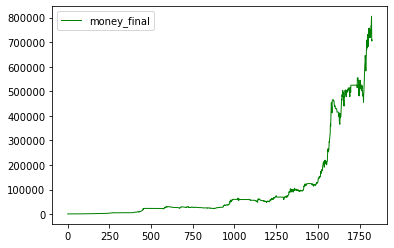

In [144]:
# 收益曲线：
plt.plot(money,color='green', label='money_final',linewidth=1)
plt.legend() # 显示图例
plt.savefig('answer.pdf')

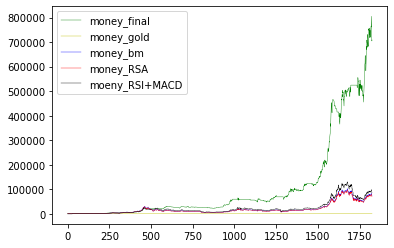

In [143]:
# 优越性：
width=0.4
plt.plot(money,color='green', label='money_final',linewidth=width)
plt.plot(money_gold,color='y', label='money_gold',linewidth=width)
plt.plot(money_bm,color='b', label='money_bm',linewidth=width)
plt.plot(money_old,color='r', label='money_RSA',linewidth=width)
plt.plot(money_old2,color='black', label='moeny_RSI+MACD',linewidth=width)

plt.legend() # 显示图例
plt.savefig('superiority.pdf')

In [103]:
# 敏感性分析：

global data_predict
data_predict=0
def test_bm(day,my_macd_B=my_macd_B,bm_RSI_30=bm_RSI_30,bm_RSI_7=bm_RSI_7):
    if day>100 :
        global data_predict
        if(data_predict.mean(0)[0]<bm_Data[day]*0.95):
            return False
    if day>100 and data_predict[13,0]< bm_Data[day]*0.9:
        return False
    if((bm_RSI_30[day]<bm_RSI_7[day]*1 or my_macd_B[day]>0)&(40<bm_RSI_7[day]<60)&(day-Large_rise>=60)&(RSI7_50[day]>=18)):#&(RSI7_50[day]>RSI7_50[day-1])识别大跌，484别买
        return True
    else: return False

global max_bm
max_bm=0
global stop_bm
stop_bm=False
def test_bm_out(day,my_macd_B=my_macd_B,bm_RSI_30=bm_RSI_30,bm_RSI_7=bm_RSI_7,bm_Data=bm_Data):
    global stop_bm
    global max_bm
    global data_predict
    # global Large_rise
    if day>100 and data_predict[13,0]< bm_Data[day]*0.9:
        return True
    if(not stop_bm and test_bm(day)):
        if(bm_Data[day]>max_bm):
            max_bm=bm_Data[day]
        elif(bm_Data[day]<max_bm*0.9):
            max_bm=0
            stop_bm=True
            return True
    if(((bm_RSI_30[day]>bm_RSI_7[day]*1 and my_macd_B[day]<0)&(80<bm_RSI_7[day]))):#识别大涨结束
        if(RSI7_50[day]>=45):
            print('large_rise')
            Large_rise=day
        stop_bm=False
        return True
    else: return False

def test_GOLD(day,my_macd_GOLD=my_macd_GOLD,gold_RSI_30=gold_RSI_30,gold_RSI_7=gold_RSI_7):
    if (gold_Data[day]==gold_Data[day-1]):
        return False
    if (day>100):
        global data_predict
        if(data_predict.mean(0)[1]<gold_Data[day]*0.9):
            return False
    if((gold_RSI_30[day]<gold_RSI_7[day]*1 and my_macd_GOLD[day]>0)&(40<gold_RSI_7[day]<60)):#少买黄金，改成and
        return True
    else: return False   

global max_gold
max_gold=0
global stop_gold
stop_gold=False
def test_gold_out(day,my_macd_GOLD=my_macd_GOLD,gold_RSI_30=gold_RSI_30,gold_RSI_7=gold_RSI_7,gold_Data=gold_Data):
    global max_gold
    global stop_gold

    if(not stop_gold and test_GOLD(day)):
        if(gold_Data[day]>max_gold):
            max_gold=gold_Data[day]
        elif(gold_Data[day]<max_gold):
            max_gold=0
            stop_gold=True
            return True
    if(((gold_RSI_30[day]>gold_RSI_7[day]*1 or my_macd_GOLD[day]<0)|(88<gold_RSI_7[day]))):#识别大顶还没写
        stop_gold=False
        return True
    else: return False



money_all=[]
alpha_gold_all=[0,0.0005,0.001,0.005,0.01,0.02,0.05,0.02,1]
alpha_bm_all=[0,0.0005,0.002,0.01,0.02,0.02,0.05,0.01,1]
for j in range(len(alpha_bm_all)):
    alpha_bm=alpha_bm_all[j]
    alpha_gold=alpha_bm_all[j]
    holding=[]#[day,money,gold,bm]
    holding.append([0,1000,0,0,0])
    money=[]
    change=1
    for i in range(28):
        money.append(0)
    for i in range(1798):
        global data_predict
        day=i+all_constant
        today=holding[i]
        today[0]=day
        if day==45:
            day=45
        if(day>90 and day%7==0):
            data_predict=multi_predict(day,csv1_path='data_set/BCHAIN-MKPRU.csv',csv2_path='data_set/LBMA-GOLD.csv',model_path='data_set/multi_channel_lstm.pth')[0]

        if(today[3]!=0 and test_bm_out(day)):
            today=[day,today[1]+today[3]*bm_Data[day]*(1-alpha_bm),today[2],0]
        if(test_gold_out(day)):
            today=[day,today[1]+today[2]*gold_Data[day]*(1-alpha_gold),0,today[3]]
        
        if(not test_bm(day) and test_GOLD(day)):
            today=[day,0,today[1]/gold_Data[day]*(1-alpha_gold)+today[2],today[3]]
            if today[3]!=0:
                if sharpeRatio(bm_rising[day-9:day],3)<sharpeRatio(gold_rising[day-9:day],3)*0.8 and np.mean(gold_rising[day-9:day])-np.mean(bm_rising[day-9:day])>alpha_gold+alpha_bm:
                    today=[day,today[1],today[2]+today[3]*change*bm_Data[day]/gold_Data[day]*(1-alpha_bm)*(1-alpha_gold),today[3]*(1-change)]

        if(test_bm(day) and not test_GOLD(day)):
            today=[day,0,today[2],today[1]/bm_Data[day]*(1-alpha_bm)+today[3]]

            if today[2]!=0:
                if sharpeRatio(gold_rising[day-9:day],3)<sharpeRatio(bm_rising[day-9:day],3)*0.8 and np.mean(bm_rising[day-9:day])-np.mean(gold_rising[day-9:day])>alpha_gold+alpha_bm:
                    today=[day,today[1],today[2]*(1-change),today[3]+today[2]*change*gold_Data[day]/bm_Data[day]*(1-alpha_bm)*(1-alpha_gold)]
            
                    
        if test_bm(day) and test_GOLD(day):
            if today[2]!=0:
                if sharpeRatio(gold_rising[day-9:day],3)<sharpeRatio(bm_rising[day-9:day],3)*0.8 and np.mean(bm_rising[day-9:day])-np.mean(gold_rising[day-9:day])>(alpha_gold+alpha_bm)*3:
                    today=[day,today[1],today[2]*(1-change),today[3]+today[2]*change*gold_Data[day]/bm_Data[day]*(1-alpha_bm)*(1-alpha_gold)]
            if today[3]!=0:
                if sharpeRatio(bm_rising[day-9:day],3)<sharpeRatio(gold_rising[day-9:day],3)*0.8 and np.mean(gold_rising[day-9:day])-np.mean(bm_rising[day-9:day])>(alpha_gold+alpha_bm)*3:
                    today=[day,today[1],today[2]+today[3]*change*bm_Data[day]/gold_Data[day]*(1-alpha_bm)*(1-alpha_gold),today[3]*(1-change)]
        today1=today.copy()
        mONEY=today[1]+today1[2]*gold_Data[day]+today1[3]*bm_Data[day]
        # today1.append(mONEY)
        print([today1,mONEY])
        money.append(mONEY)
        holding.append(today1)
    money_all.append(money)

[[28, 0, 0, 1.6242995208316413], 999.9999999999999]
[[29, 0, 0, 1.6242995208316413], 1003.0699260943717]
[[30, 0, 0, 1.6242995208316413], 998.5706164216681]
[[31, 0.0, 0, 1.6242995208316413], 1031.4464387233006]
[[32, 0.0, 0, 1.6242995208316413], 1032.9895232680906]
[[33, 0.0, 0, 1.6242995208316413], 1029.8383821976772]
[[34, 0.0, 0, 1.6242995208316413], 1036.2056363193374]
[[35, 0.0, 0, 1.6242995208316413], 1041.8581986518313]
[[36, 0.0, 0, 1.6242995208316413], 1037.878664825794]
[[37, 0.0, 0, 1.6242995208316413], 1033.525542109965]
[[38, 0.0, 0, 1.6242995208316413], 1022.0904734833103]
[[39, 0, 0, 1.6242995208316413], 1019.605295216438]
[[40, 0.0, 0, 1.6242995208316413], 1026.4273532039308]
[[41, 0, 0.8412910196473662, 0.0], 1064.6958499147242]
[[42, 0, 0.8412910196473662, 0.0], 1064.6958499147242]
[[43, 0, 0.8412910196473662, 0.0], 1064.6958499147242]
[[44, 0, 0.8412910196473662, 0.0], 1067.9348203403667]
[[45, 0, 0.8412910196473662, 0.0], 1068.8602404619787]
[[46, 0, 0.841291019647

Trading singular:1028    Finally gains:744023.0269056505
Trading singular:1083    Finally gains:751214.1045233516
Trading singular:1139    Finally gains:1799925.533345307
Trading singular:1175    Finally gains:1238586.0829343903
Trading singular:1175    Finally gains:453339.35695620085
Trading singular:1175    Finally gains:20877.51739929
Trading singular:0    Finally gains:0.0


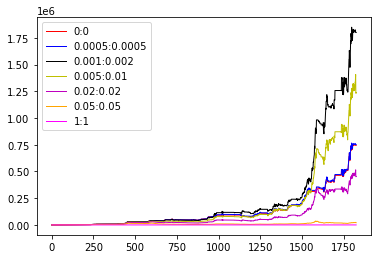

In [142]:
COLOR=['red','blue','black','y','g','m','orange','c','magenta']
for i in range(len(alpha_gold_all)):
    x=0
    if i==4 or i==7: continue
    for k in range(1825):
        if(money_all[i][k]!=money_all[i][k+1]):
            x=x+1
    plt.plot(money_all[i],color=COLOR[i], label=str(alpha_gold_all[i])+":"+str(alpha_bm_all[i]),linewidth=1)
    print("Trading singular:"+str(x)+"    Finally gains:"+str(money_all[i][1825]))
plt.legend() # 显示图例
plt.savefig('sensibility.pdf')

In [136]:
#最大回撤：
def get_max_drawdown_fast(array):
    drawdowns = []
    max_so_far = array[0]
    for i in range(len(array)):
        if array[i] > max_so_far:
            drawdown = 0
            drawdowns.append(drawdown)
            max_so_far = array[i]
        else:
            drawdown = (max_so_far - array[i])/max_so_far
            drawdowns.append(drawdown)
    return max(drawdowns)
print("最大回撤：")
print(get_max_drawdown_fast(money_final))

0.27728455830227383

In [141]:
#胜率：
x=0
for i in range(1825):
    if money_final[i+1]>=money_final[i]:
        x=x+1
print("win rate:")
print(x/1826)

win rate:
0.7135815991237678


In [168]:
# sharpeRatio
data=[]
for i in range(1825):
    data.append((money_final[i+1]/money_final[i]-1)*365)
L=len(data)
arr_mean = np.mean(data)
print("Standard deviation of return rate")
arr_std = np.std(data,ddof=1)
print(arr_std)

print("sharpeRatio:")
print((142.826-0.018)/arr_std)

Standard deviation of return rate
9.714212158155382
sharpeRatio:
14.70093484422288


In [169]:
# informationRatio
old_std=(money_old2[-1]-1000)/1000/5
data=[]
for i in range(1825):
    data.append((money_final[i+1]/money_final[i]-1)*365-old_std)
L=len(data)
arr_mean = np.mean(data)
arr_std = np.std(data,ddof=1)
print("informationRatio:")
print((142.826-(money_old2[-1]-1000)/1000)/arr_std)

informationRatio:
5.790627762776442
